# Car-Accident-Severity 
Python Notebook

# Table of contents

1. Introduction/Business Problem
2. Data
3. Methodology

 3.1 Exploratory Data Analysis
 3.2 Modeling, Testing and Evaluation
 
4. Results and Discussion
5. Conclusion and Recommendations

# 1. Introduction / Business problem

  Road Traffic Injuries (RTIs) are a major public health problem. The World Health Organization (WHO) reports that the number of deaths due to road accidents has exceeded one million in recent years. (1)
  The problem is huge and concerns everyone, a fact that makes the analysis of road accidents necessary. Forecasts have been rising in recent decades. (2) The analytical approach to the data will provide answers that can be used to identify and predict factors that affect the severity of road accidents.
  The most popular scientific method is Machine Learning, because it has the ability to identify existing patterns in data and to predict, through the creation and evaluation of different algorithms.
  Furthermore, Machine Learning can manage another problem that arises, the large amounts of data that are generated, since road accidents are frequent and increasing at a rapid rate.


# 2. Data

Based on the process (CRISP-DM), we can download data that will be utilized by SDOT Traffic Management Division, Traffic Records Group, Seattle, United States).

In [4]:
# Download File
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-05 13:39:59--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  20.4MB/s    in 3.6s    

2020-09-05 13:40:03 (19.7 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [5]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

In [6]:
# Load Data File
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [13]:
# Rename X and Y with Longitude and Latitude 
df1 = df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
df1.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Text(0.5, 1.0, 'Car Accident Severity (Inbalanced)')

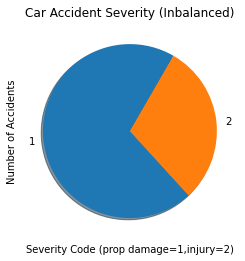

In [62]:

df.SEVERITYCODE.value_counts().plot(kind='pie',shadow=True, startangle=60)
plt.xlabel('Severity Code (prop damage=1,injury=2)') 
plt.ylabel('Number of Accidents') 
plt.title('Car Accident Severity (Imbalanced)')

In [15]:
# MISSING VALUES
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [16]:
# MAJORITY - MINORITY
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

# MINORITY
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results

# MAJORITY - MINORITY
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# NEW
df_upsampled.SEVERITYCODE.value_counts()

2    136485
1    136485
Name: SEVERITYCODE, dtype: int64

Text(0.5, 1.0, 'Accident Severity (Balanced)')

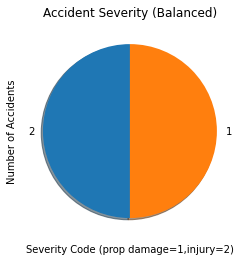

In [70]:
# Let's see how balanced the dataset using oversmapling looks.
df_upsampled.SEVERITYCODE.value_counts().plot(kind='pie',shadow=True, startangle=90)
plt.xlabel('Severity Code (prop damage=1,injury=2)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (Balanced)')

In [18]:
# Drop LOCATION; Langitude and Latitude used instead.
# Two copies of SEVERITYCODE exist, drop the second SEVERITYCODE.1
#Drop columns incluidng codes: OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM --->
#ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
#Drop redundant infos: STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL--->
#PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE  
df2 = df1.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [19]:
# COLUMNS TYPE
df2.dtypes

SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
PERSONCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
INATTENTIONIND     object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
dtype: object

In [21]:
# COLUMNS NAMES
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

In [22]:
# DATAFRAME SHAPE
df2.shape

(194673, 11)

In [23]:
# NEW MISSING VALUES
df2.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

In [24]:
# UNIQUE VALUES
df2['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

# HANDLE MISSING VALUES
## Replace NaN, Other, Unknown e.t.c values by the most frequent value for all COLUMNS , encode & count them.


In [26]:

df2['WEATHER'].replace(np.NaN, "Clear", inplace=True)


In [28]:

encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df2.replace(encoding_WEATHER, inplace=True)
df2['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [29]:

df2['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [30]:

df2['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [31]:

encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_SPEEDING, inplace=True)
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [32]:

df2['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [33]:

df2['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [34]:

encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df2.replace(encoding_LIGHTCOND, inplace=True)
df2['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [35]:
df2['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [36]:

df2['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [37]:

encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df2.replace(encoding_ROADCOND, inplace=True)
df2['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [38]:

df2['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [39]:

df2['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [40]:
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df2.replace(encoding_JUNCTIONTYPE, inplace=True)
df2['JUNCTIONTYPE'].value_counts()

1    96138
2    62810
3    22790
4    10671
5     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

# Calculate & Count the AVG of LONGITUDE/LATITUDE

In [44]:
avg_LONGITUDE = df2["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df2['LONGITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LONGITUDE: -122.33051843903843


In [46]:
df2['LATITUDE'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: LATITUDE, Length: 23839, dtype: int64

In [47]:
avg_LATITUDE = df2["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df2['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)


Average of LATITUDE: 47.61954251768817


In [48]:
# 1:prop damage   2:injury
df2['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [49]:
df2['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [50]:
df2['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [51]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_INATTENTIONIND, inplace=True)
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [52]:
df2.isna().sum()

SEVERITYCODE      0
LONGITUDE         0
LATITUDE          0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [53]:
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,1,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,1,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0


In [54]:
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

# 3. Methodology
After gaining an understanding of the problem, the data had to be transformed to a form on which a machine learning model could be implemented. The first thing that was done was to check the data types of each variable and then explore how many variables were missing some entries.
The data types in the Seattle dataset mostly comprised categorical variables and objects; it was concluded that a Simple/Multiple/Polynomial Regression would not work here. The variables in the dataset were listed in plain English and most of them were to be encoded with integers in an ordinal manner.

In the next step, the features are processed for predictive modeling analysis. 4 machine learning models are created using the classification techniques as listed below:

K-Nearest Neighbors (KNN)
Decision Tree
Logistic Regression
Random Forest

The created models are tested and then evaluated based on their accuracy score to find the more accurate model.



#  3.1 Exploratory Data Analysis 
The map with markers of the accident locations in Seattle

In [71]:

#Installing Folium Package for mapping
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.2.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-3.1           |   py36h45558ae

In [125]:
# VISUALIZE 400 DATA POINTS
limit = 400
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]

In [126]:
# INCIDENTS IN DF

Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

incidents = folium.map.FeatureGroup()

#  400 POINTS GROUPING
for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )

# MAPPING
Seattle_map.add_child(incidents)

In [74]:
# SELECT SEVERITY 2 IN NEW DF
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0
7,2,-122.320780,47.614076,3,1,2,0,1,1,0,0
9,2,-122.384700,47.528475,2,2,2,0,1,1,0,0
14,2,-122.317414,47.664028,2,2,1,0,1,1,1,0


# Weather Conditions - Severity

In [75]:
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

1    37856
2    11176
3     8745
5      187
4      171
6       28
7       15
8        7
9        3
Name: WEATHER, dtype: int64

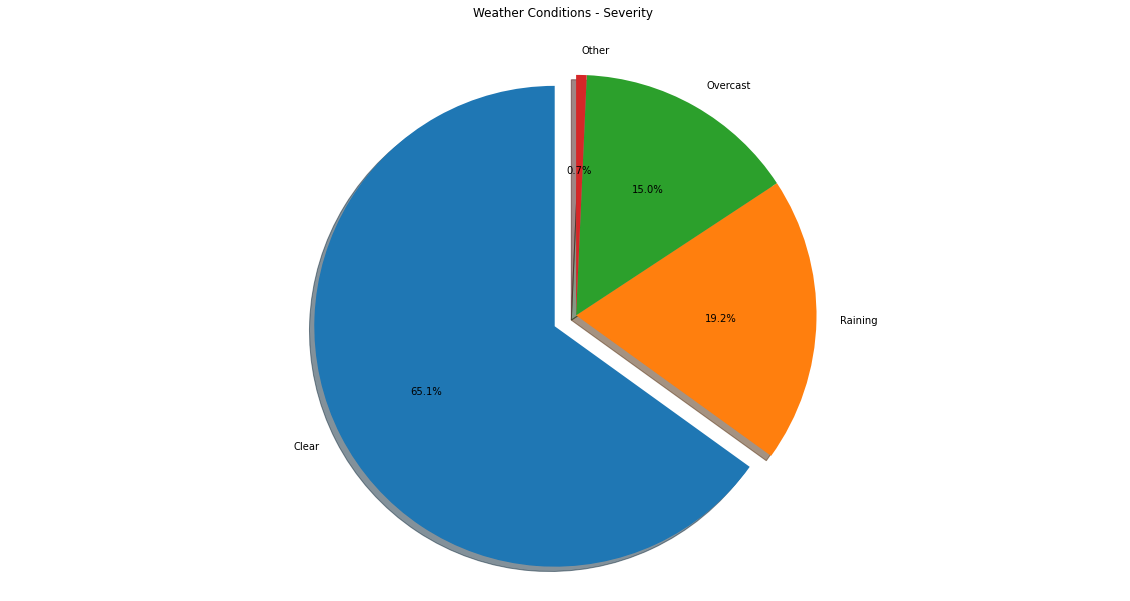

In [77]:
labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [37856, 11176, 8745, sum(Sev_2_w[3:9])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Weather Conditions - Severity ', y=1.05)
plt.show()

# Persons - Severity

In [78]:
Sev_2_p = Sev_2['PERSONCOUNT'].value_counts()
Sev_2_p

2     27811
3     13461
4      6295
1      3296
5      2969
0      1762
6      1357
7       637
8       284
9       129
10       74
11       33
12       20
13       12
17        8
15        7
14        7
16        5
22        2
19        2
34        2
23        1
32        1
28        1
27        1
25        1
24        1
48        1
37        1
54        1
39        1
20        1
18        1
81        1
29        1
30        1
Name: PERSONCOUNT, dtype: int64

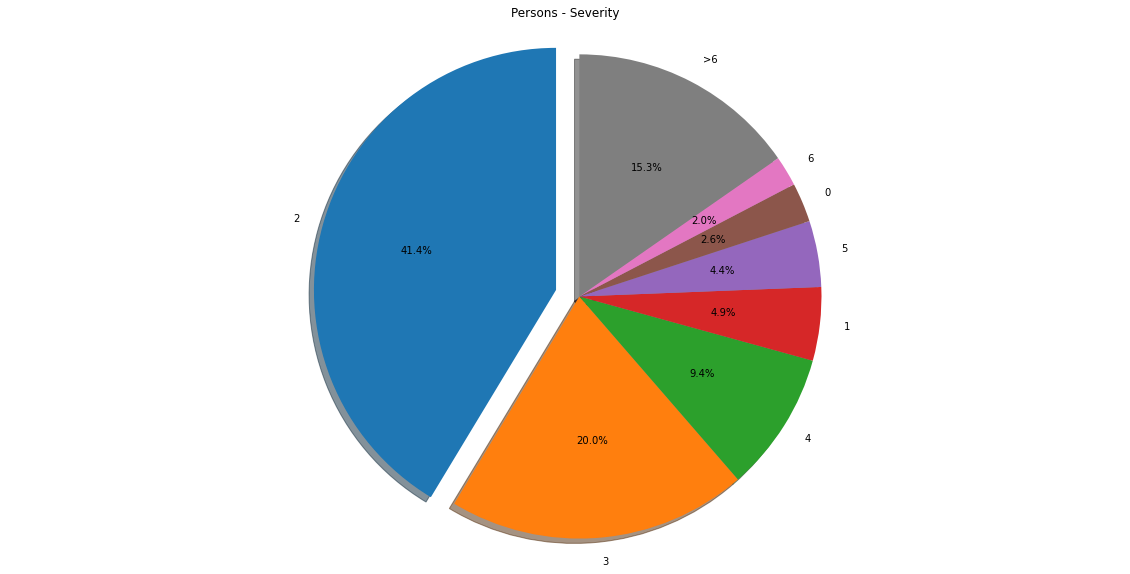

In [127]:
labels = 2, 3, 4, 1, 5, 0, 6, '>6'
sizes = [27811, 13461, 6295, 3296, 2969, 1762, 1357, sum(Sev_2_p[3:9])]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Persons - Severity', y=1)
plt.show()

# Vehicles - Severity 

In [122]:

Sev_2_v = Sev_2['VEHCOUNT'].value_counts()
Sev_2_v

2     35949
1     14105
3      5470
0      1227
4      1078
5       261
6        60
7        22
9         6
8         5
11        3
10        2
Name: VEHCOUNT, dtype: int64

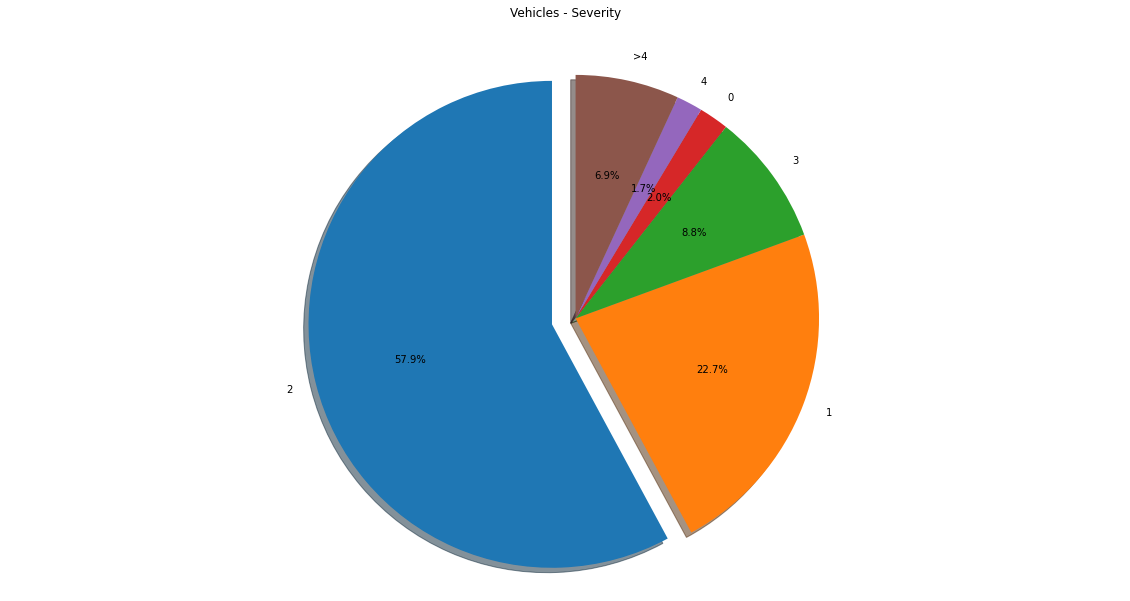

In [123]:
labels = 2, 1, 3, 0, 4,'>4'
sizes = [35949, 14105, 5470, 1227, 1078, sum(Sev_2_p[5:12])]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Vehicles - Severity', y=1.05)
plt.show()

# Junction Type - Severity 

In [81]:
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
Sev_2_j

2    27174
1    19806
3     7297
4     3234
5      623
6       54
Name: JUNCTIONTYPE, dtype: int64

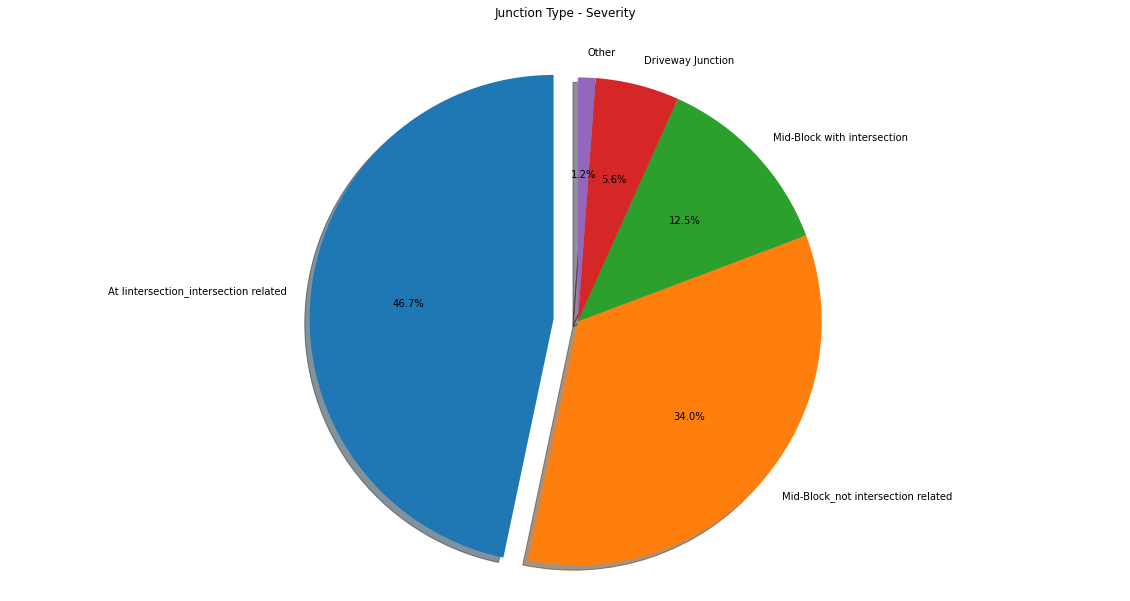

In [82]:
labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27174, 19806, 7297, 3234, sum(Sev_2_j[4:6])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Junction Type - Severity', y=1.05)
plt.show()

# Inattention - Severity 

In [83]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
Sev_2_i

0    47791
1    10397
Name: INATTENTIONIND, dtype: int64

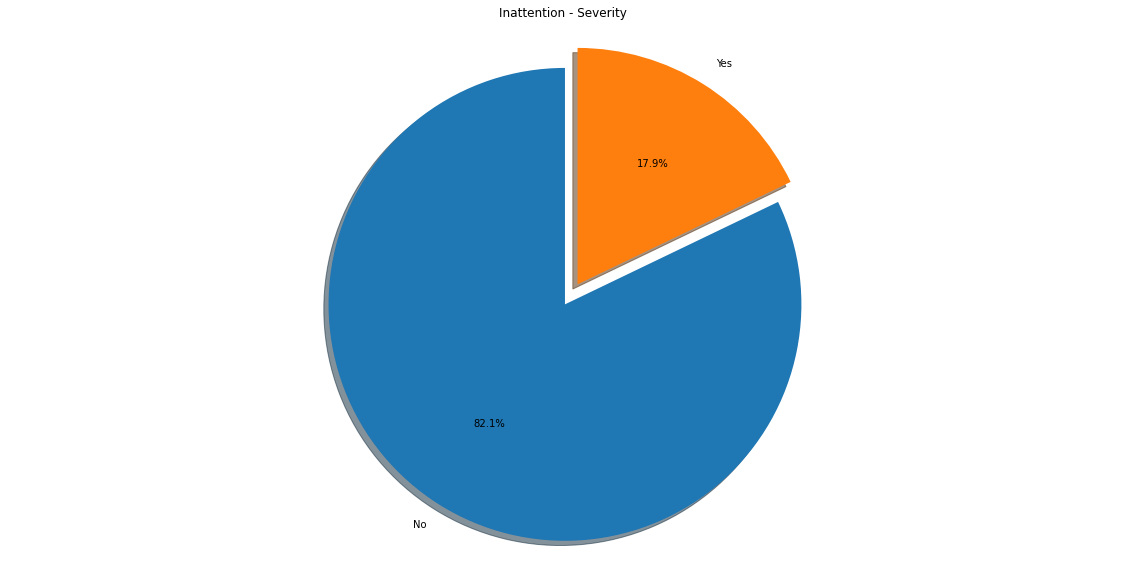

In [84]:

labels = 'No', 'Yes'
sizes = [47791, 10397]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Inattention - Severity ', y=1)
plt.show()

# Road Conditions - Severity 

In [85]:

Sev_2_r = Sev_2['ROADCOND'].value_counts()
Sev_2_r

1    41916
2    15755
3      273
4      167
5       30
7       24
6       23
Name: ROADCOND, dtype: int64

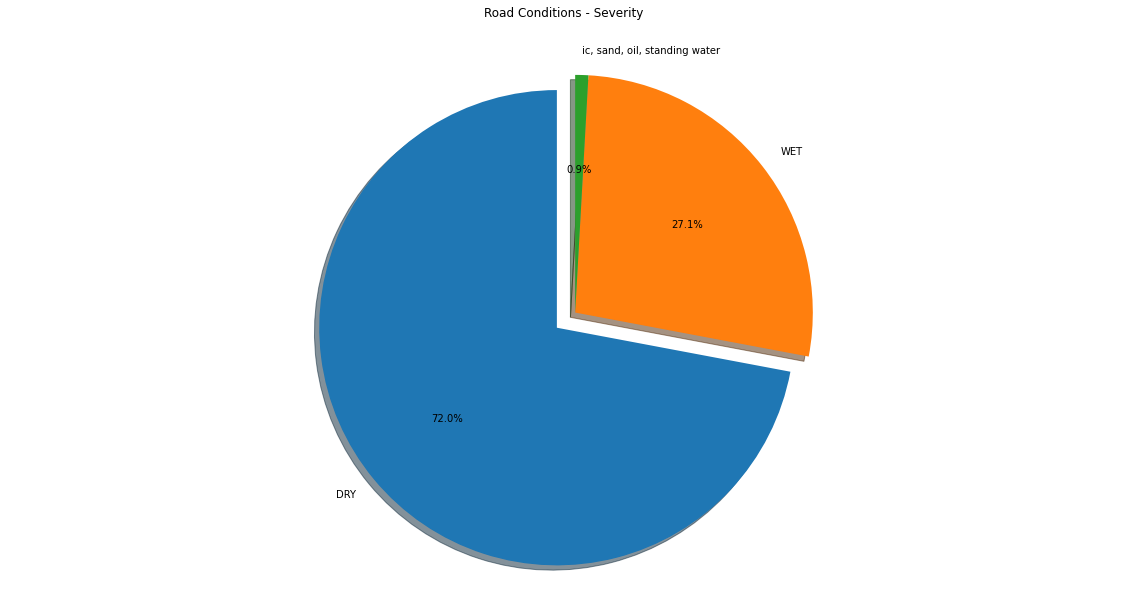

In [87]:
labels = 'DRY', 'WET', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Road Conditions - Severity ', y=1.05)
plt.show()

# Light Conditions - Severity

In [ ]:
Sev_2_l = Severity_2['LIGHTCOND'].value_counts()
Sev_2_l

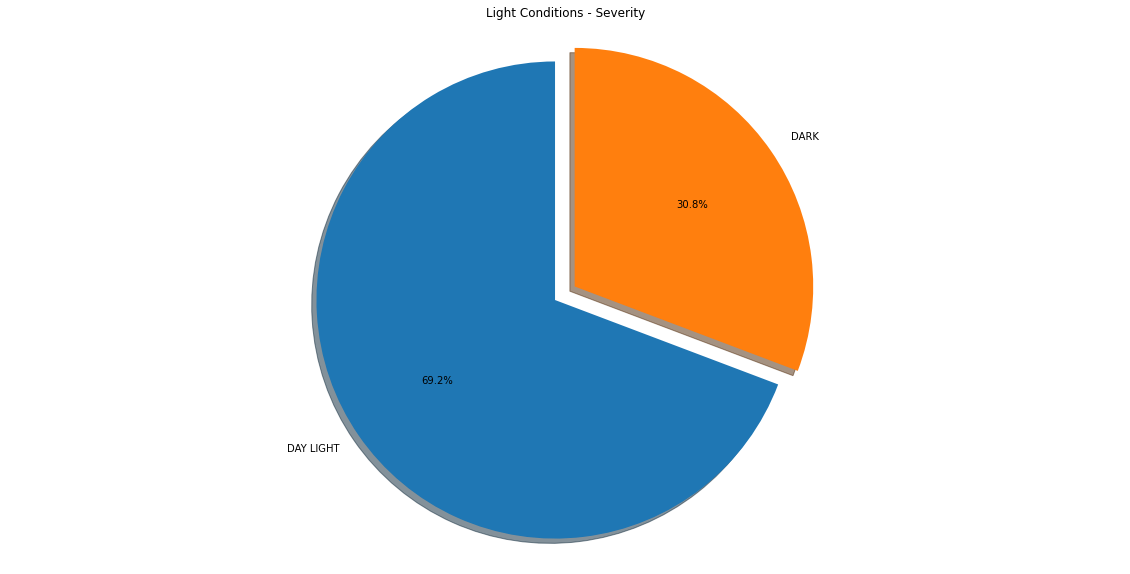

In [88]:

labels = 'DAY LIGHT', 'DARK'
sizes = [40291, 17897]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Light Conditions - Severity', y=1)
plt.show()

# Speed - Severity 

In [ ]:
Sev_2_s = Severity_2['SPEEDING'].value_counts()
Sev_2_s

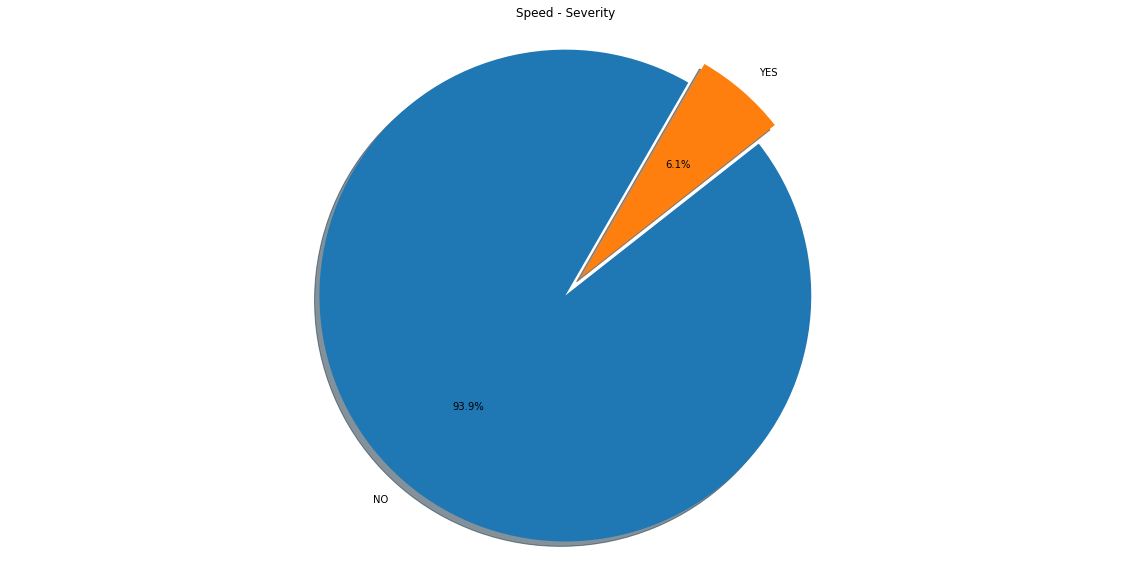

In [90]:
labels = 'NO', 'YES'
sizes = [54657, 3531]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Speed - Severity', y=1)
plt.show()

# 3.2 Modeling, Testing and Evaluation Section

In [91]:
# NEW DF
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [92]:
X = Feature

In [93]:
y = df2['SEVERITYCODE'].values

# Normalize Data

In [94]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.24930404,  1.50948129, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  1.91514317,  1.3926872 , -0.66472702, -0.22440165],
       [-0.56747188,  0.49889979, -0.33020207,  0.12553783, -0.81596734,
        -0.42518348,  0.64986567,  1.3926872 ,  1.50437693, -0.22440165],
       [-0.1360361 , -0.21073866,  1.15576451,  1.7102107 , -0.81596734,
        -0.42518348,  1.91514317, -0.53629605, -0.66472702, -0.22440165],
       [-0.14494267, -0.26614566,  0.41278122,  1.7102107 , -0.81596734,
        -0.42518348, -0.61541182, -0.53629605, -0.66472702, -0.22440165],
       [ 0.81495737, -1.33262277, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  0.64986567,  1.3926872 , -0.66472702, -0.22440165]])

In [95]:
# CREATE TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 10) (155738,)
Test set: (38935, 10) (38935,)


# Apply K-Nearest Neighbours (KNN) 

In [96]:
# BEST K
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # TRAIN-PREDICT  
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66605882, 0.71539746, 0.6977013 , 0.72559394, 0.71442147,
       0.73132143, 0.72153589, 0.73293951, 0.72677539])

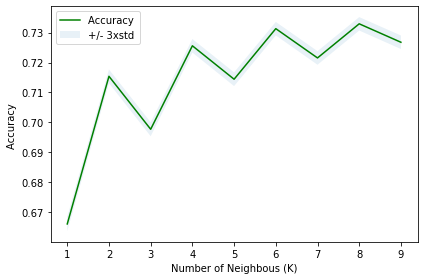

In [99]:
# PLOT ACCURACY - NEIGHBOURS
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbous (K)')
plt.tight_layout()
plt.show()

In [100]:
# BEST K
print( "Best k =", mean_acc.argmax()+1)

Best k = 8


In [102]:
# BEST K MODEL
k=8
kNNeigh= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNNeigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [103]:
# EVALUATION
print("K-Nearest Neighbours Accuray: ", metrics.accuracy_score(y_test, yhat))

K-Nearest Neighbours Accuray:  0.7267753948889174


# Apply Decision Tree

In [104]:
# DECISION TREE MODEL
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
# PREDICTION
yhat = DTree.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
# EVALUATION
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.7429562090663927


# Apply Logistic Regression

In [107]:
# LR MODEL
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [109]:
# PREDICTION
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [110]:
# EVALUATION
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regresion's Accuracy:  0.7030949017593425


# Apply Random Forest

Text(0.5, 1.0, 'Car Accident Severity (Inbalanced)')

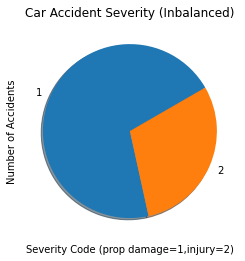

In [120]:

df.SEVERITYCODE.value_counts().plot(kind='pie',shadow=True, startangle=30)
plt.xlabel('Severity Code (prop damage=1,injury=2)') 
plt.ylabel('Number of Accidents') 
plt.title('Car Accident Severity (Inbalanced)')

In [111]:
# RF MODEL
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
# PREDICTION
yhat =clf.predict(X_test)

In [114]:
# EVALUATION
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Random Forest's Accuracy:  0.7130859124181328


# Visualize RF


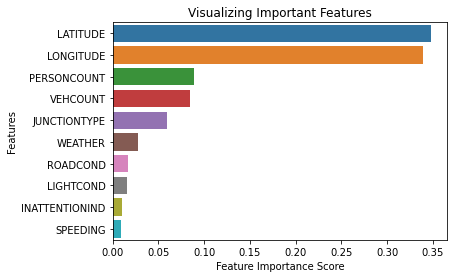

In [116]:
# LISTS
feat_labels = ['SEVERITYCODE', 'LONGITUDE', 'LATITUDE','PERSONCOUNT', 
               'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
               'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
# PREDICTION TARGET
target='SEVERITYCODE'

# ARRAYS

# set X and y
y = df2[target]
X = df2.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# RF CLASSIFIER
clf = RandomForestClassifier(n_estimators=100)

# TRAIN CLASSIFIER
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# PLOTTING K
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# LABELS
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# 4. Results and Discussion 

## Plot the accuracy score versus algorithm

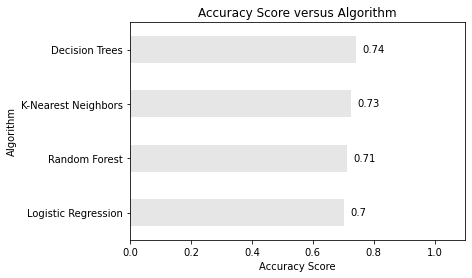

In [118]:

algo_lst =['K-Nearest Neighbors','Decision Trees','Logistic Regression','Random Forest']

accuracy_lst = [0.7267753948889174, 0.7429562090663927, 0.7030949017593425, 0.711878772312829]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.9')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Accuracy Score versus Algorithm')

plt.show()

ACCURASIES SCORES by the algorithms 
K-Nearest Neighbors, 
Decision Tree, 
Logistic Regression, 
Random Forest,
the decision tree has been proved to give better accuracy.


# 5. Conclusion and Recommendations

Accuracy Ratings MODELS

Four machine learning algorithms (K-Nearest Neighbors, Decision Trees, Logistic Regression, and Random Forest) are applied in which the decision tree has shown better compatibility with the dataset, resulting in higher accuracy (0.74).

One idea for future work can be developing the decision tree machine learning model to improve its accuracy further. Adding more data to the dataset can help to compensate for the missing values. Gathering more data about other parameters such as the age of the drivers can also help to gain a more detailed insight into the car accident severity.

Better models could have been made if data was more comprehensive and had less unknown and missing values. The analyses done could also have held more value if greater target variable class-data was available and was not limited to property damage only and physical injury.
